In [1]:
import matplotlib.pyplot as plt
import os
import shutil
from collections import defaultdict
import tensorflow as tf
from tensorflow import keras
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

2025-07-31 15:03:40.015830: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-31 15:03:40.027258: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 15:03:40.094719: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-31 15:03:40.162963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753995820.228840  138247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753995820.24

In [6]:
def count_files_in_polymnist(source_base_path):
    count_by_m_folder = defaultdict(int)
    count_by_class = defaultdict(int)

    for split in ['train', 'test']:
        split_path = os.path.join(source_base_path, split)
        print(f"\n=== {split.upper()} ===")

        for m_folder in ['m0', 'm1', 'm2', 'm3', 'm4']:
            m_path = os.path.join(split_path, m_folder)
            if not os.path.exists(m_path):
              print(f"folder {m_path} not found")
              continue

            files = [f for f in os.listdir(m_path) if f.endswith('.png')]
            count_by_m_folder[m_folder] = len(files)
            print(f"{m_folder}: {len(files)} archivos")

            for filename in files:
                label = filename.split('.')[-2]
                count_by_class[label] += 1

    return count_by_class

def count_files_in_new_folder(source_base_path):
    count_by_m_folder = defaultdict(int)
    count_by_class = defaultdict(int)

    distribution = {"train":{}, "test":{}}


    for split in ['train', 'test']:
        split_path = os.path.join(source_base_path, split)
        print(f"\n=== {split.upper()} ===")

        for m_folder in range(10):
            m_path = os.path.join(split_path, str(m_folder))
            if not os.path.exists(m_path):
                continue

            files = [f for f in os.listdir(m_path) if f.endswith('.png')]
            count_by_m_folder[m_folder] = len(files)
            print(f"{m_folder}: {len(files)} archivos")
            distribution[split][m_folder] = len(files)

            for filename in files:
                label = filename.split('.')[-2]
                count_by_class[label] += 1

    #print("\n=== RESUMEN POR CLASE ===")
    #for label in sorted(count_by_class.keys()):
    #    print(f"Clase {label}: {count_by_class[label]} imágenes")

    return count_by_class, distribution



In [7]:
# Rutas
base_path = 'img/numbers'

# Ejecutar la función
count_by_class, distribution = count_files_in_new_folder(base_path)

print(distribution)



=== TRAIN ===
0: 29615 archivos
1: 33710 archivos
2: 29790 archivos
3: 30655 archivos
4: 29210 archivos
5: 27105 archivos
6: 29590 archivos
7: 31325 archivos
8: 29255 archivos
9: 29745 archivos

=== TEST ===
0: 4900 archivos
1: 5675 archivos
2: 5160 archivos
3: 5050 archivos
4: 4910 archivos
5: 4460 archivos
6: 4790 archivos
7: 5140 archivos
8: 4870 archivos
9: 5045 archivos
{'train': {0: 29615, 1: 33710, 2: 29790, 3: 30655, 4: 29210, 5: 27105, 6: 29590, 7: 31325, 8: 29255, 9: 29745}, 'test': {0: 4900, 1: 5675, 2: 5160, 3: 5050, 4: 4910, 5: 4460, 6: 4790, 7: 5140, 8: 4870, 9: 5045}}


/tmp/ipykernel_138247/1678811948.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img      = imread(os.path.join(cls_path, img_file))


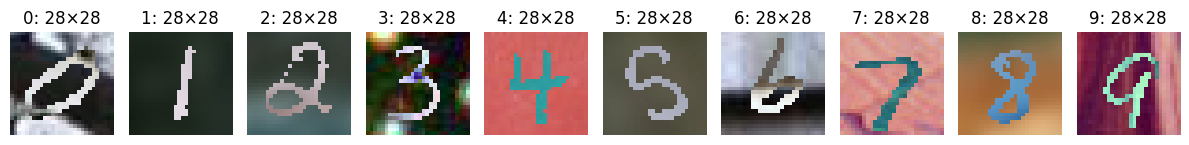

In [10]:
# ———————— Bloque 1: Una imagen por clase en TRAIN con resolución ————————
import os
import matplotlib.pyplot as plt
from imageio import imread  # o desde matplotlib.image import imread

base_path    = 'img/numbers'
train_folder = os.path.join(base_path, 'train')

train_dirs = sorted(d for d in os.listdir(train_folder)
                    if os.path.isdir(os.path.join(train_folder, d)))

plt.figure(figsize=(12, 3))
for i, cls in enumerate(train_dirs):
    cls_path = os.path.join(train_folder, cls)
    img_file = os.listdir(cls_path)[0]         # primer archivo
    img      = imread(os.path.join(cls_path, img_file))

    # extraer ancho y alto
    h, w = img.shape[:2]

    ax = plt.subplot(1, len(train_dirs), i+1)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{cls}: {w}×{h}")
    ax.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipykernel_138247/1463945346.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img      = imread(os.path.join(cls_path, img_file))


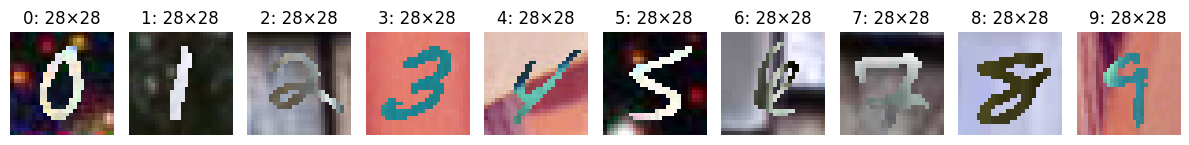

In [11]:
# ———————— Bloque 2: Una imagen por clase en TEST con resolución ————————
import os
import matplotlib.pyplot as plt
from imageio import imread

base_path   = 'img/numbers'
test_folder = os.path.join(base_path, 'test')

test_dirs = sorted(d for d in os.listdir(test_folder)
                   if os.path.isdir(os.path.join(test_folder, d)))

plt.figure(figsize=(12, 3))
for i, cls in enumerate(test_dirs):
    cls_path = os.path.join(test_folder, cls)
    img_file = os.listdir(cls_path)[0]
    img      = imread(os.path.join(cls_path, img_file))

    h, w = img.shape[:2]

    ax = plt.subplot(1, len(test_dirs), i+1)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{cls}: {w}×{h}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## MODELO DE LA PAGINA

In [ ]:
#LNET-5
import os
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_path = 'img/numbers'
train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical'
)
test_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)

n_classes = train_gen.num_classes

model = Sequential([
    Conv2D(6,  kernel_size=5, activation='tanh',  input_shape=(28,28,1), padding='same'),
    AveragePooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation='tanh'),
    AveragePooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84,  activation='tanh'),
    Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=test_gen
)



Se entrenó un modelo LeNet-5 clásico, conformado por dos bloques de convolución y pooling con activación tanh, seguidos de dos capas densas intermedias y una capa de salida softmax sobre las 10 clases. Cada bloque de convolución usa filtros 5×5 (6 en el primero, 16 en el segundo) y reducción de resolución mediante average pooling 2×2. Tras “aplanar” las características, la red pasa por dos capas fully-connected de 120 y 84 unidades (ambas con tanh) antes de la capa softmax. Para optimizar se emplea el optimizador Adam con tasa de aprendizaje 0.001, y la pérdida es categorical\_crossentropy. Se entrenó sobre 300 000 imágenes de entrenamiento y validó en 50 000 de prueba, escalando los píxeles a $0,1$ y sin más preprocesado ni augmentación.


391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9135 - loss: 0.2872
> Test accuracy: 91.348%


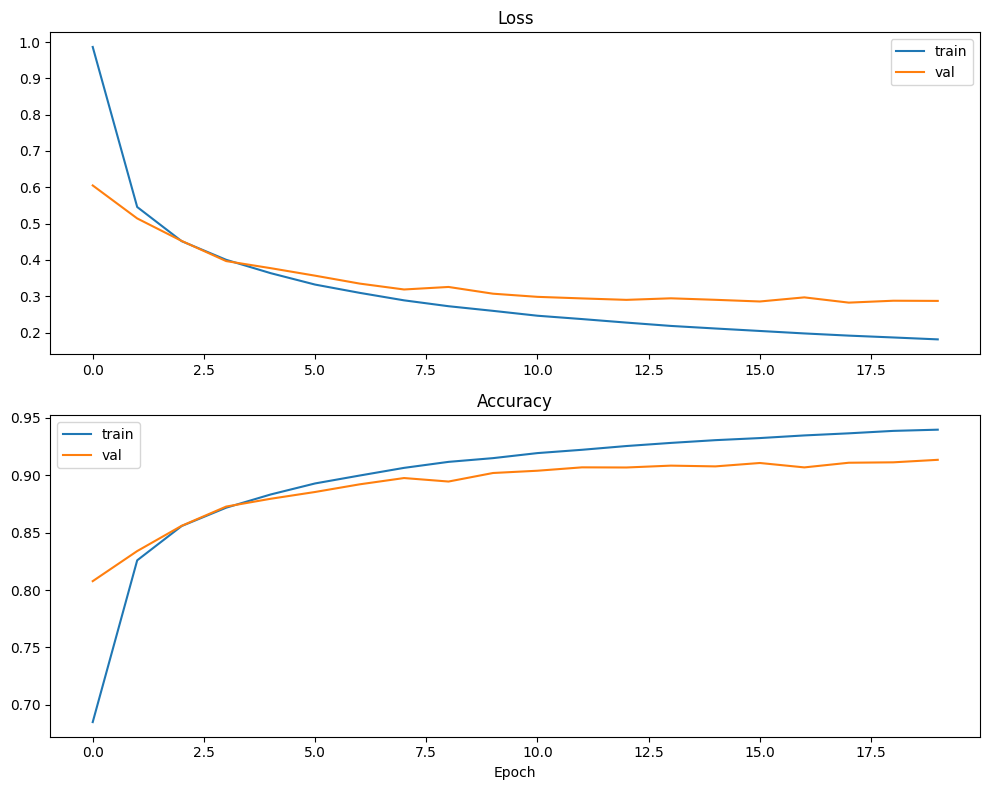

In [19]:

loss, acc = model.evaluate(test_gen, steps=len(test_gen), verbose=1)
print(f"> Test accuracy: {acc*100:.3f}%")

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(history.history['loss'],     label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],     label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

El modelo obtuvo aproximadamente un 93.8 % de precisión en el conjunto de entrenamiento y alrededor de 91.3 % en validación tras 20 épocas. En la gráfica de pérdida la curva de entrenamiento cae de forma continua desde \~1.0 hasta \~0.18, mientras que la pérdida de validación desciende rápidamente en las primeras 5–7 épocas hasta estabilizarse en torno a 0.28–0.30 con pequeñas oscilaciones. En la curva de accuracy vemos que el entrenamiento arranca en \~0.68 y crece de manera sostenida hasta \~0.94, mientras que la validación pasa de \~0.81 a \~0.91, siguiendo muy de cerca al entrenamiento sin brechas excesivas. Esto indica que el modelo está aprendiendo bien las características del dígito y generaliza bien, sin indicios de overfitting.

In [20]:
model.save('lenet5.h5')
print("Modelo guardado en lenet5.h5")


Modelo guardado en lenet5.h5


## Image transformation

In [1]:
import os
import numpy as np
from scipy.ndimage import map_coordinates, gaussian_filter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def elastic_transform(
    image: np.ndarray,
    alpha: float = 36,
    sigma:  float = 6,
    random_state: np.random.RandomState | None = None
) -> np.ndarray:
    """
    Aplica una deformación elástica a una imagen 2D o 3D (canales).
    Parámetros:
      - image: array de forma (h, w) o (h, w, c), dtype float o uint8.
      - alpha: escala de la deformación (intensidad).
      - sigma: desviación estándar para el filtro gaussiano.
      - random_state: instancia de RandomState para reproducibilidad.
    Devuelve:
      - transformed: mismo shape que `image`.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape[:2]
    # 1) Generar desplazamientos aleatorios suavizados
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode='constant', cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode='constant', cval=0) * alpha

    # 2) Malla de coordenadas original
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))

    # 3) Índices deformados
    indices = (
        (y + dy).reshape(-1, 1),
        (x + dx).reshape(-1, 1)
    )

    # 4) Aplicar mapeo para cada canal (o canal único)
    if image.ndim == 3:
        transformed = np.zeros_like(image)
        for c in range(image.shape[2]):
            channel = image[:, :, c]
            warped  = map_coordinates(channel, indices, order=1, mode='reflect')
            transformed[:, :, c] = warped.reshape(shape)
    else:
        warped = map_coordinates(image, indices, order=1, mode='reflect')
        transformed = warped.reshape(shape)

    return transformed

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=15,          # rotaciones ±15°
    width_shift_range=0.1,      # desplazamiento horizontal 10%
    height_shift_range=0.1,     # desplazamiento vertical 10%
    shear_range=10,             # cizallamiento ±10°
    zoom_range=0.1,             # zoom ±10%
    preprocessing_function=lambda img: elastic_transform(img),
    fill_mode='nearest'         # relleno de píxeles vacío
)

train_gen_aug = train_datagen.flow_from_directory(
    directory=os.path.join('img','numbers','train'),
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1/255.0)
val_gen_aug = val_datagen.flow_from_directory(
    directory=os.path.join('img','numbers','test'),
    target_size=(28,28),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical',
    shuffle=False
)


2025-08-02 09:13:01.688091: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-02 09:13:01.697617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-02 09:13:01.752157: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-02 09:13:01.803925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754147581.849844    6902 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754147581.86

Found 300000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.


Se realizaron transformaciones sobre las imágenes para que el modelo viera en cada época variaciones realistas de los números y aprendiera a generalizar mejor. Con `ImageDataGenerator` se aplicó un reescalado de píxeles a $0,1$ y se introdujeron pequeños giros (±15°), desplazamientos horizontales/verticales (±10 % del ancho/alto), y zooms leves (±10 %). Además, se incorporó una deformación elástica estilo LeCun para “retorcer” ligeramente cada imagen, de manera que simula distorsiones naturales del papel y el escáner.


2025-08-02 09:54:43.422544: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-02 09:54:43.430369: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-02 09:54:43.483166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-02 09:54:43.530250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754150083.571477    5675 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754150083.58

Found 300000 images belonging to 10 classes.
Found 50000 images belonging to 10 classes.
Epoch 1/10


/home/fabricio/UVG/DataScience/Lab3_DS/LAB3_DS/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-02 09:54:49.915008: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/fabricio/UVG/DataScience/Lab3_DS/LAB3_DS/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 177s 19ms/step - accuracy: 0.7832 - loss: 0.6821 - val_accuracy: 0.9608 - val_loss: 0.1224 - learning_rate: 0.0010
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 138s 15ms/step - accuracy: 0.8818 - loss: 0.3814 - val_accuracy: 0.9719 - val_loss: 0.0889 - learning_rate: 0.0010
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 140s 15ms/step - accuracy: 0.9000 - loss: 0.3254 - val_accuracy: 0.9764 - val_loss: 0.0719 - learning_rate: 0.0010
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 142s 15ms/step - accuracy: 0.9082 - loss: 0.2983 - val_accuracy: 0.9700 - val_loss: 0.0918 - learning_rate: 0.0010
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 143s 15ms/step - accuracy: 0.9145 - loss: 0.2782 - val_accuracy: 0.9768 - val_loss: 0.0711 - learning_rate: 0.0010
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 143s 15ms/step - accuracy: 0.9182 - loss: 0.2670 - val_accuracy: 0.9823 - val_loss: 0.0566 - learning_rate: 0.0010
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 141s 15ms/step - accuracy: 

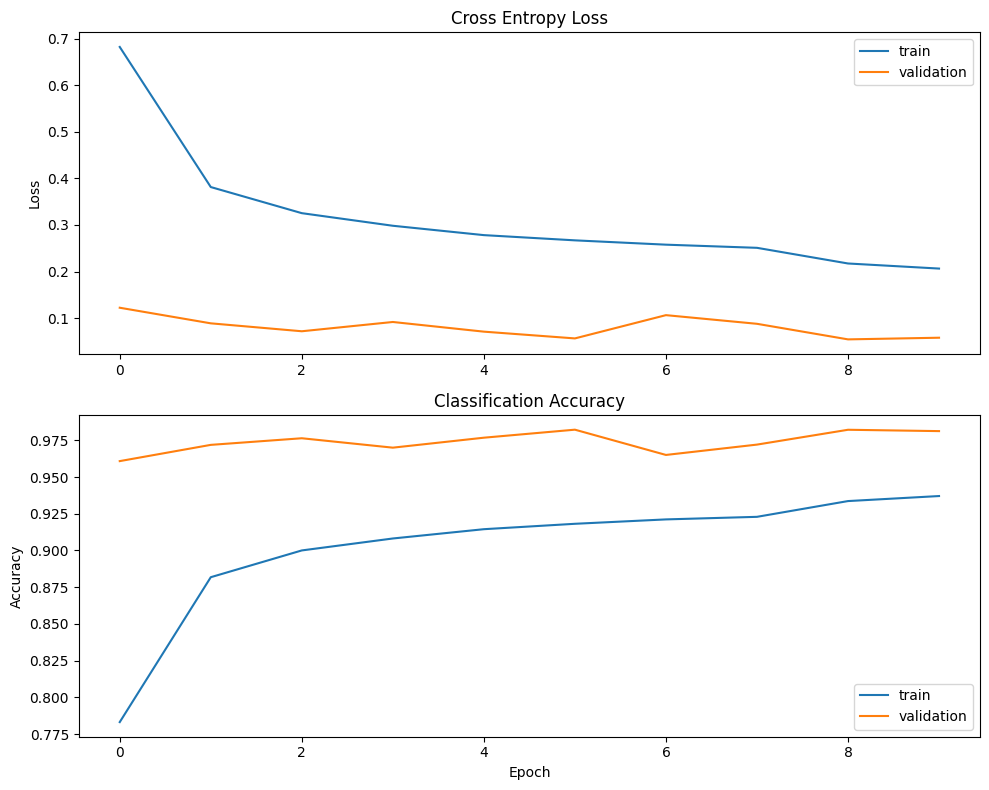

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, MaxPooling2D,
    Dropout, Flatten, Dense
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.1,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'img/numbers/train',
    target_size=(28,28),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    'img/numbers/test',
    target_size=(28,28),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
#mejor modelo
n_classes = train_generator.num_classes

model_cnn_v2 = Sequential([
    # Bloque 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    # Bloque 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    # Bloque 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Capas finales
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

model_cnn_v2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6
)
callbacks = [early_stop, reduce_lr]

# Entrenamiento
epochs = 10
train_steps = train_generator.samples // train_generator.batch_size
val_steps   = test_generator.samples  // test_generator.batch_size

history_v2 = model_cnn_v2.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=val_steps,
    callbacks=callbacks,
    verbose=1
)

loss, acc = model_cnn_v2.evaluate(
    test_generator,
    steps=val_steps,
    verbose=1
)
print(f"Test accuracy: {acc * 100.0:.2f}%")

plt.figure(figsize=(10,8))
# test
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history_v2.history['loss'],     label='train')
plt.plot(history_v2.history['val_loss'], label='validation')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history_v2.history['accuracy'],     label='train')
plt.plot(history_v2.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


Se reentrenó el mejor modelo: model\_cnn\_v2, pero utilizando la data aumentada mediante rotaciones, desplazamientos, shear, zoom y deformación elástica. Al comparar ambas curvas, observamos que con los datos normales el modelo alcanzaba cerca de 91 % de accuracy en validación y mostraba una brecha creciente entre entrenamiento y validación a lo largo de las épocas (segunda imagen). Con la augmentación la curva de validación se eleva hasta alrededor de 98.2 % de test accuracy y la pérdida de validación permanece muy baja (\~0.05–0.10) durante todo el entrenamiento (primera imagen). Esto indica que la augmentación ha reducido significativamente el sobreajuste y ha mejorado la robustez del modelo ante variaciones en el trazo manuscrito.


In [2]:
# Guarda en formato HDF5
model_cnn_v2.save('model_cnn_v2.h5')
print("Modelo guardado en model_cnn_v2.h5")

Modelo guardado en model_cnn_v2.h5


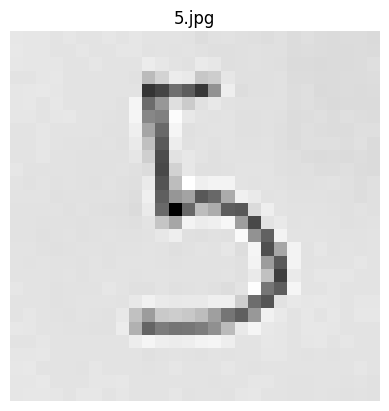

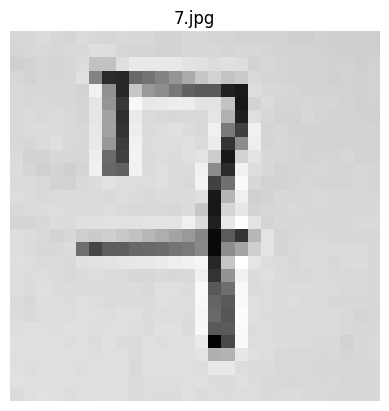

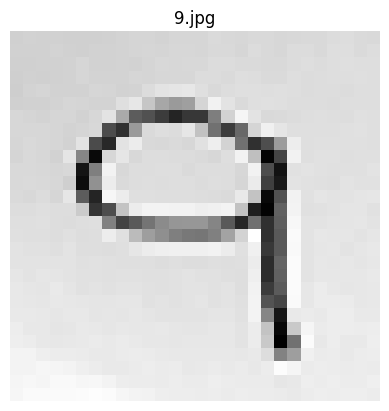

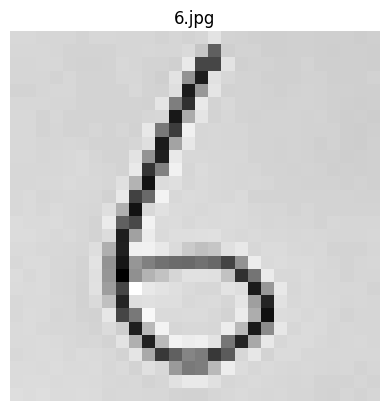

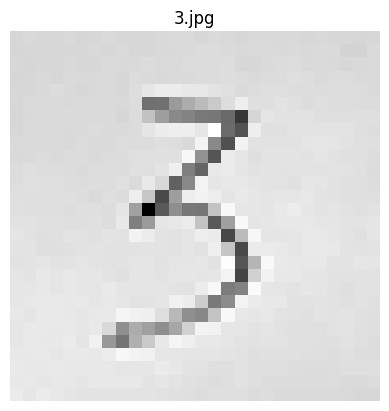

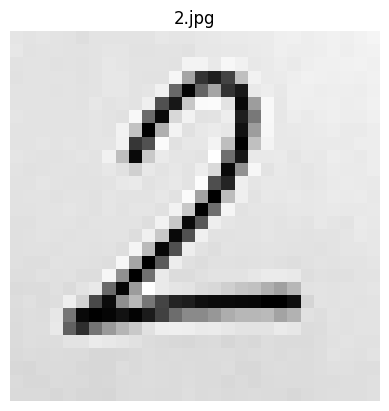

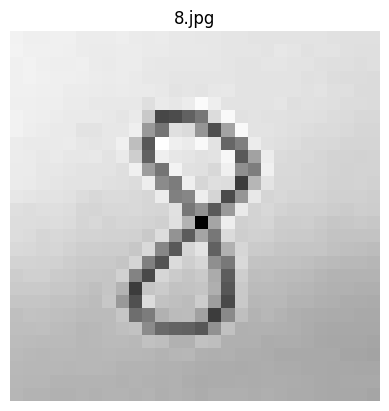

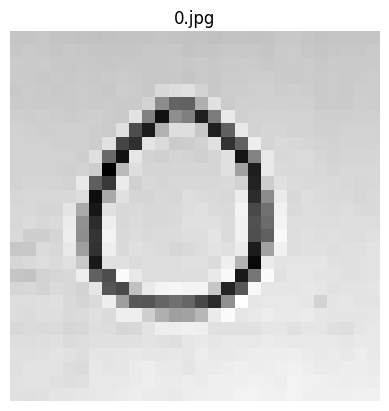

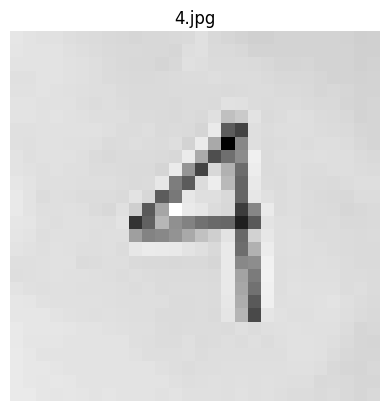

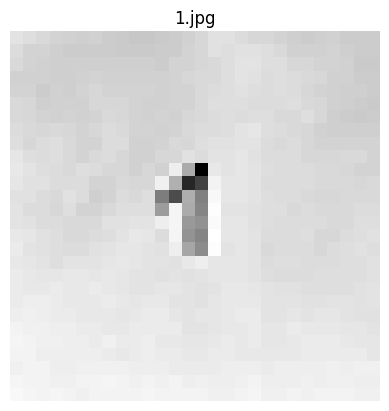

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5.jpg                → Predicción: 5 (100.0%)
7.jpg                → Predicción: 7 (85.0%)
9.jpg                → Predicción: 9 (100.0%)
6.jpg                → Predicción: 6 (100.0%)
3.jpg                → Predicción: 3 (100.0%)
2.jpg                → Predicción: 2 (100.0%)
8.jpg                → Predicción: 8 (100.0%)
0.jpg                → Predicción: 0 (100.0%)
4.jpg                → Predicción: 4 (97.4%)
1.jpg                → Predicción: 1 (90.2%)


In [5]:
from PIL import Image, ImageOps
import numpy as np
import os
import matplotlib.pyplot as plt

hand_dir = os.path.join('img','numbers','handwritten')
files = [f for f in os.listdir(hand_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]

X_hand, names = [], []
resample_method = getattr(Image, 'Resampling', Image).LANCZOS

for fname in files:
    path = os.path.join(hand_dir, fname)
    img  = Image.open(path).convert('L')
    if np.mean(img) < 127:
        img = ImageOps.invert(img)
    img = img.resize((28,28), resample=resample_method)
    arr = np.array(img, dtype=np.float32)/255.0

    X_hand.append(arr)
    names.append(fname)

    plt.imshow(arr, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

X_hand = np.stack(X_hand, axis=0)

if model_cnn_v2.input_shape[-1] == 3:
    X_hand = np.repeat(X_hand[...,None], 3, axis=-1)
else:
    X_hand = X_hand[..., None]  # shape (N,28,28,1)
o
preds = model_cnn_v2.predict(X_hand)
classes = np.argmax(preds, axis=1)

for fname, cls, prob in zip(names, classes, np.max(preds, axis=1)):
    print(f"{fname:20s} → Predicción: {cls} ({prob*100:.1f}%)")


Se realizó la prueba con los dígitos del 0 al 9, escrito a mano por uno de los integrantes del grupo. Estas imágnes fueron escritas sobre una hoja
de papel blanca y con un marcador fino Sharpie. Antes de pasarle la data al modelo se le realizaron algunas tranformaciones como la de la resolución para
que sea similar a la que ha estado utilizando en sus entrenamientos. Sepuede observar que tuvo un 100% de precisión acertando en cado uno de los dígitos, aunque teniendo una probabilidad para algounos como el 1, 7 y 4, lo cual puede deberse a la imagen o bien al desempeño en general del modelo, pero nada son resultados decepcionantes, sino todo lo contrario.

Tras evaluar los distintos enfoques se concluye que el más acertado para el problema de reconocimiento de caracteres es model_cnn_v2 entrenado sobre datos aumentados. Mientras que el SVM apenas rozó el 47 % y el KNN simple alcanzó alrededor del 95 %, LeNet-5 puro se quedó cerca del 91 %. En cambio, nuestra CNN con tres bloques convolucionales, normalización por lotes, dropout reforzado y entrenamiento sobre imágenes rotadas, desplazadas y elásticamente deformadas superó el 98 % de accuracy en test. Esta combinación aumenta la capacidad de generalización frente a la variabilidad inherente del trazo a mano reduciendo el sobreajuste y convirtiéndola en la opción más sólida para reconocer dígitos.
